# **Social network product purchase**


### **Objective** : 
The objective of this analysis is to predict whether a person will buy a product displayed on a social network ad 

### Import Library

In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

sns.set(style = 'darkgrid')




### Import DataSet

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
199,15708228,Male,35,22000,0
382,15715622,Female,44,139000,1
96,15710257,Female,35,25000,0
391,15592570,Male,47,23000,1
53,15671655,Female,35,23000,0


In [6]:
# Check null values in each feature
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# Check duplicate value 
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


* 'Gender' : Categorical value
* 'Age' : Integer value
* 'EstimatedSalary' : Integer value
* 'Purchased' :Target variable        

In [9]:
# drop user id(no use)
df.drop('User ID', axis = 1, inplace=True)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


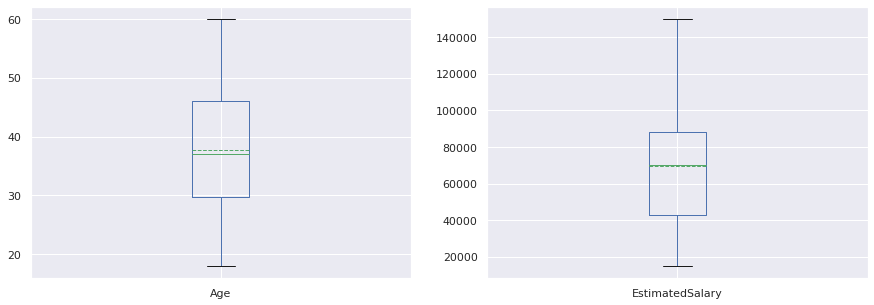

In [11]:
# Checking outliers
fig, ax = plt.subplots(1,2, figsize = (15, 5))
df['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True)
df['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)
#sns.boxplot(df['EstimatedSalary'], ax = ax[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6960d71048>,
      dtype=object)

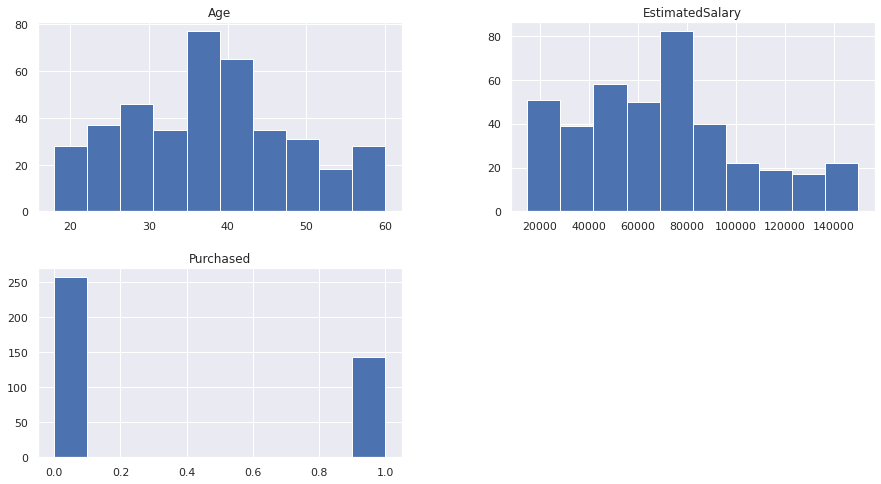

In [12]:
df.hist(figsize = (15, 8))

In [13]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

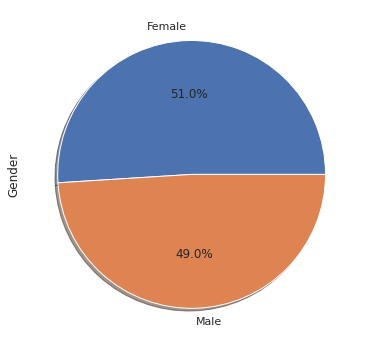

In [14]:
# pie plot
df['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8))

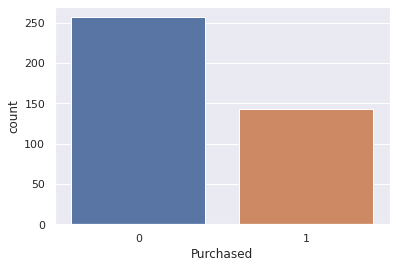

In [15]:
sns.countplot('Purchased', data = df)

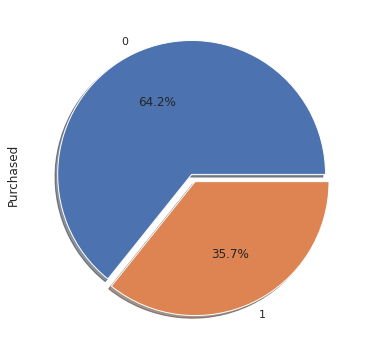

In [16]:
df['Purchased'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8), explode = [0, 0.06])

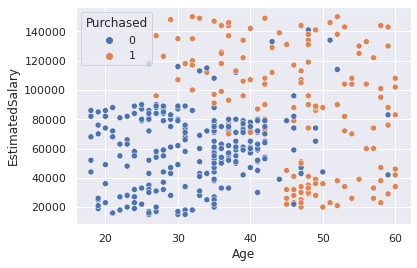

In [17]:
# Bivariate analysis
sns.scatterplot('Age', 'EstimatedSalary', data = df, hue = 'Purchased')

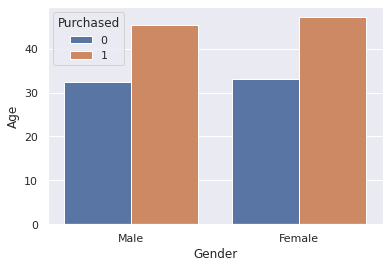

In [18]:
sns.barplot('Gender', 'Age',data = df, hue = 'Purchased', ci = False)

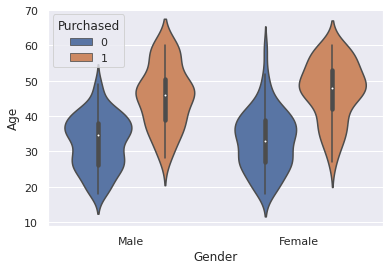

In [19]:
sns.violinplot('Gender', 'Age',data = df, hue = 'Purchased')

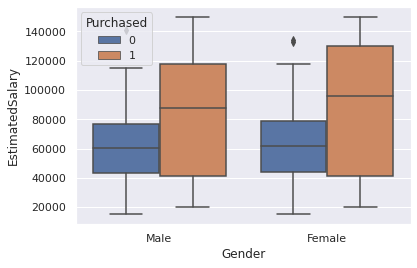

In [20]:
sns.boxplot('Gender', 'EstimatedSalary',data = df, hue = 'Purchased')

##### There is no use of Gender feature because there is no(less) efferct of Gender on Purchased

In [21]:
df.drop('Gender', inplace=True, axis = 1)

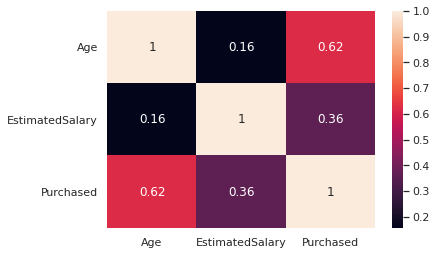

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

In [24]:
X.shape, y.shape

((400, 2), (400,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
# Normalizing the data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### Logistics Regression

In [27]:
model_list = []
score_list = []

model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model : Logistics Regression")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

Model : Logistics Regression
Accuracy : 0.89
Recall_Score : 0.75
precission_Score : 0.89


### Random Forest

In [28]:
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RandomForest Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('RandomForestClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : RandomForest Classifier
Accuracy : 0.94
Recall_Score : 0.94
precission_Score : 0.88


### Gradient Boosting

In [29]:
model3 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01)
model3.fit(X_train, y_train)
score3 = accuracy_score(y_test, model3.predict(X_test))
print("Model : GradientBoosting Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('GradientBoostingClassifier')
score_list.append(score3)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model3.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model3.predict(X_test))))

Model : GradientBoosting Classifier
Accuracy : 0.94
Recall_Score : 0.91
precission_Score : 0.91


### Ada Boost

In [30]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
score4 = accuracy_score(y_test, model4.predict(X_test))
print("Model : AdaBoost Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('AdaBoostClassifier')
score_list.append(score4)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model4.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model4.predict(X_test))))

Model : AdaBoost Classifier
Accuracy : 0.91
Recall_Score : 0.84
precission_Score : 0.87


### Support vector Classifier

In [31]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : Support vector Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('Support vectorClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : Support vector Classifier
Accuracy : 0.93
Recall_Score : 0.91
precission_Score : 0.88


### Naive Bayes

In [32]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GaussianNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : GaussianNB
Accuracy : 0.90
Recall_Score : 0.78
precission_Score : 0.89


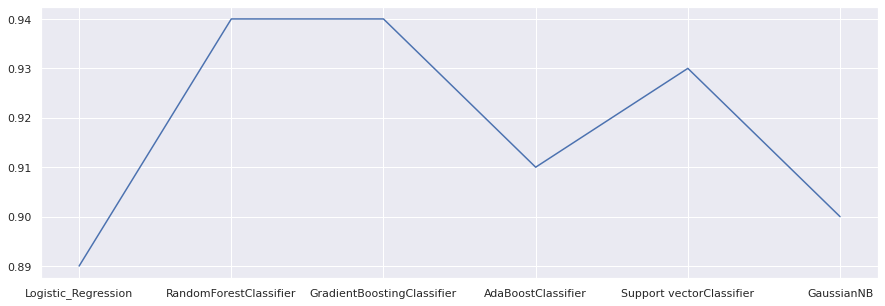

In [33]:
plt.figure(figsize=(15, 5))
sns.lineplot(model_list, score_list)

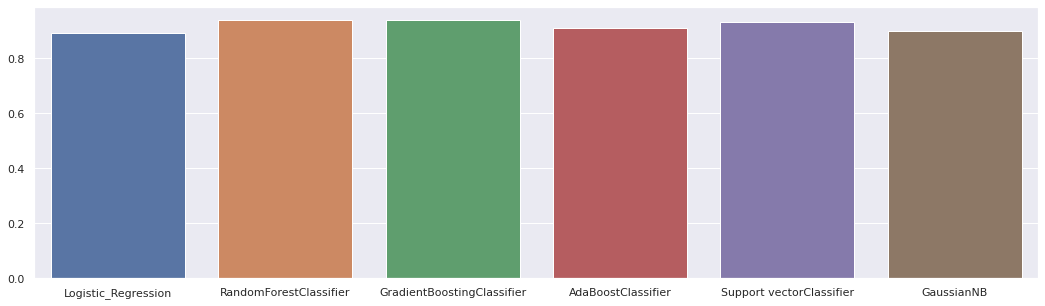

In [34]:
plt.figure(figsize=(18, 5))
sns.barplot(model_list, score_list)

# we can say that Gradient Boosting, Random forest works well